# <center><ins>Inference</ins></center>

## <ins>Import the required libraries or packages for inferencing</ins>

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #supress TF logging 1
import pathlib
import tensorflow as tf
tf.get_logger().setLevel('ERROR') #supress TF logging 2

import time # import this library to check the elapsed time
from object_detection.utils import label_map_util # Given label map proto returns categories list compatible with eval
from object_detection.utils import visualization_utils as viz_utils #A set of functions that are used for visualisation

import numpy as np # for data structure arrays and mathematical operations
from PIL import Image # Python image library to deal with the images
import matplotlib.pyplot as plt  # To create figures and plots
import warnings # To ignore warnings
import os # Importing this library so we ca interact with the operating system and can access directories we want
warnings.filterwarnings('ignore')

### Enable GPU dynamic memory allocation

In [30]:
# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [31]:
IMAGE_PATHS = 'test_images/' # Set the path for test images

--------------------------------------------------------------------------------------------------------

## <ins>Faster R-CNN Resnet101</ins>

---------------------------------------------------------------------------------------------------------

### <ins>Set the path of saved model directory</ins>

In [32]:
PATH_TO_MODEL = "faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8"

PATH_TO_MODEL_DIR = './training/TF2/training/{}/saved_model/saved_model/'.format(PATH_TO_MODEL)

print(PATH_TO_MODEL_DIR)

./training/TF2/training/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/saved_model/


---------------------------------------------------------------------------------------------------------

### <ins>Set the path of classes labels</ins>

In [33]:
PATH_TO_LABELS = './data/label_map.pbtxt'

--------------------------------------------------------------------------------------------------------

### <ins>To draw a bounding boxes around detected objects</ins>

#### The function of below script is to load the saved model and make the prediction on test images. After that it is creating bounding boxes around the objects (in our case birds) inside the images. 

Loading model...Done! Took 7.346215009689331 seconds
Running inference for test_images/Periparus_ater1.jpeg... Done
Running inference for test_images/pexels-pixabay-87451.jpg... Done
Running inference for test_images/Periparus_ater3.jpeg... Done
Running inference for test_images/nature.jpeg... Done
Running inference for test_images/Erithacus_rubecual.jpg... Done
Running inference for test_images/Erithacus_rubecual2.jpg... Done
Running inference for test_images/Periparus_ater2.jpeg... Done
Running inference for test_images/four-magpies-foraging-in-a-mid-wales-woodlands-in-summer-PE1GFD.jpg... Done
Running inference for test_images/Pica_pica.jpeg... Done
Running inference for test_images/Pica_pica2.jpeg... Done
Running inference for test_images/Erithacus_rubecual3.jpg... Done
Running inference for test_images/Periparus_ater.jpeg... Done
Running inference for test_images/sparrow-7316565__340.jpg... Done
Running inference for test_images/Pica_pica1.jpeg... Done
Running inference for test_i

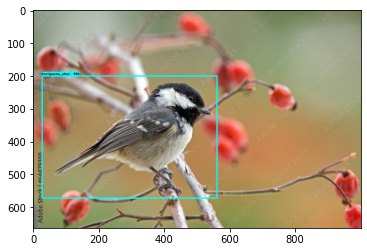

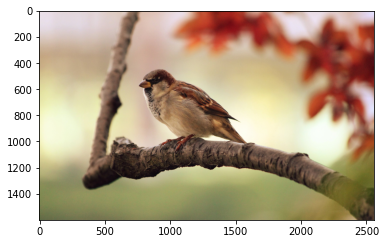

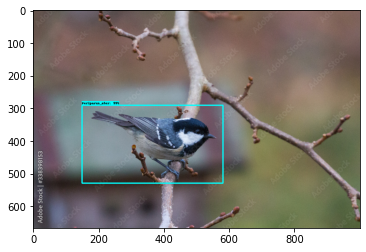

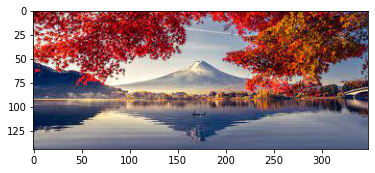

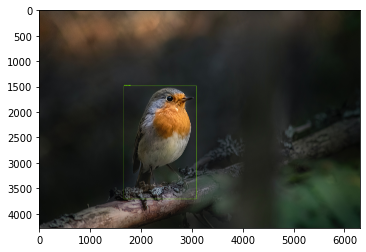

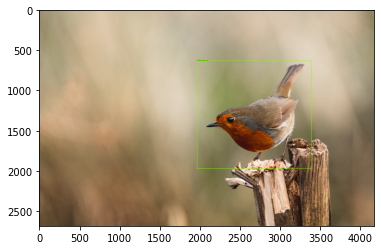

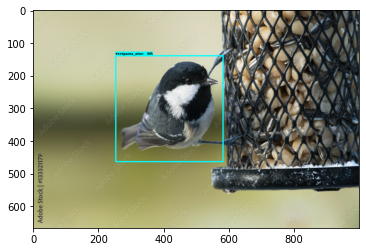

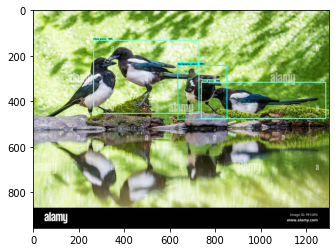

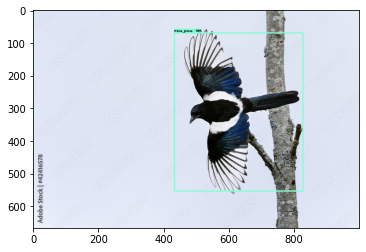

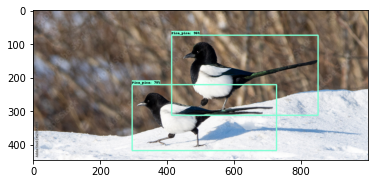

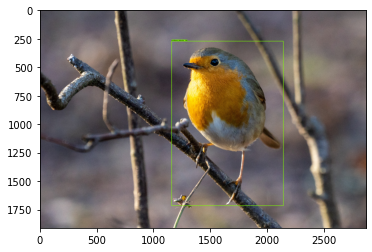

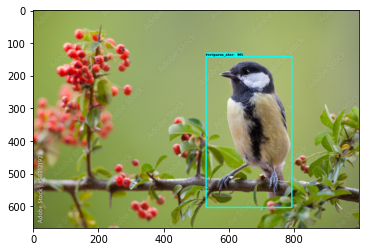

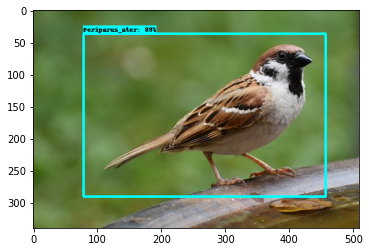

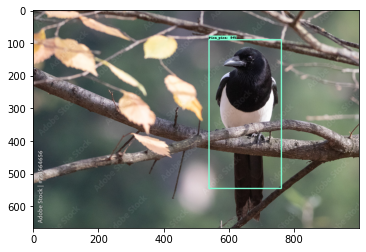

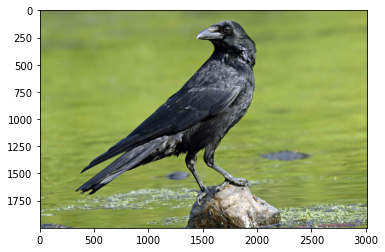

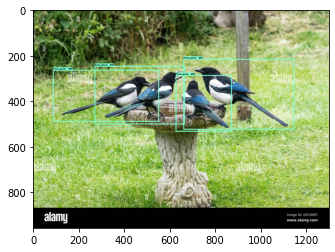

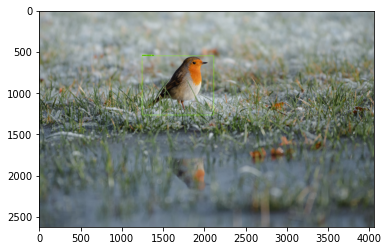

In [34]:
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR

print('Loading model...', end='')
start_time = time.time()
# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


# Suppress Matplotlib warnings
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
    path: the file path to the image
    Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

for image_path in os.listdir(IMAGE_PATHS):
    image_path = os.path.join(IMAGE_PATHS, image_path)
    print('Running inference for {}... '.format(image_path), end='')
    image_np = load_image_into_numpy_array(image_path)
    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()
    # Convert image to grayscale
    # image_np = np.tile()
    # np.mean(image_np, 2, keepdims=True), (1, 1, 3).astype(np.uint8)
        # The input needs to be a tensor, convert it using `tf.convert_to_tensor`
    input_tensor = tf.convert_to_tensor(image_np)
        # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]
        # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)
        # All outputs are batches tensors.
        # Convert to numpy arrays, and take index [0] to remove the batch dimensi
        # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                    for key, value in detections.items()}
    detections['num_detections'] = num_detections
        # detection_classes should be ints./

    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    image_np_with_detections = image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.75,
        agnostic_mode=False)
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()
# sphinx_gallery_thumbnail_number = 2



### <ins>Min Score Threshold</ins>

#### To filter out more detections we can set <mark>min_score_thresh</mark> values range from 0 to 1. In this model, we set the min_score_thresh to <mark>0.75</mark> because here the model predicts a particular box having an object belonging to a certain class very well.

### <ins>Inference Discussion</ins>

#### From above inferencing of this faster R-CNN resnet101 object detection model it can be seen that model predicts the classes so well except inferenced image at 8th number. This image having multiple objects, model could not predict one object. 

#### In order to test some other bird specie we included the image having sparrow and crow. We also tried one image having no bird species. For these images our model did not predict anything.  

---------------------------------------------------------------------------------------------------------

## <ins>Faster R-CNN Inception Resnet</ins>

--------------------------------------------------------------------------------------------------------

### <ins>Set the path of saved model directory</ins>

In [44]:
PATH_TO_MODEL = "faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8"

PATH_TO_MODEL_DIR = './training/TF2/training/{}/saved_model/saved_model/'.format(PATH_TO_MODEL)

print(PATH_TO_MODEL_DIR)

./training/TF2/training/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/saved_model/saved_model/


---------------------------------------------------------------------------------------------------------

### <ins>Set the path of classes labels</ins>

In [45]:
PATH_TO_LABELS = './data/label_map.pbtxt'

---------------------------------------------------------------------------------------------------------

### <ins>To draw a bounding boxes around detected objects</ins>

#### The function of below script is to load the saved model and make the prediction on test images. After that it is creating bounding boxes around the objects (in our case birds) inside the images. 

Loading model...Done! Took 15.68202543258667 seconds
Running inference for test_images/Periparus_ater1.jpeg... Done
Running inference for test_images/pexels-pixabay-87451.jpg... Done
Running inference for test_images/Periparus_ater3.jpeg... Done
Running inference for test_images/nature.jpeg... Done
Running inference for test_images/Erithacus_rubecual.jpg... Done
Running inference for test_images/Erithacus_rubecual2.jpg... Done
Running inference for test_images/Periparus_ater2.jpeg... Done
Running inference for test_images/four-magpies-foraging-in-a-mid-wales-woodlands-in-summer-PE1GFD.jpg... Done
Running inference for test_images/Pica_pica.jpeg... Done
Running inference for test_images/Pica_pica2.jpeg... Done
Running inference for test_images/Erithacus_rubecual3.jpg... Done
Running inference for test_images/Periparus_ater.jpeg... Done
Running inference for test_images/sparrow-7316565__340.jpg... Done
Running inference for test_images/Pica_pica1.jpeg... Done
Running inference for test_i

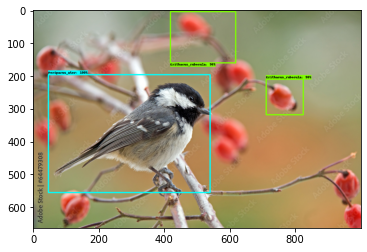

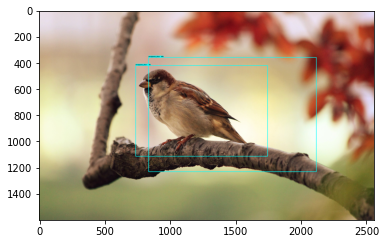

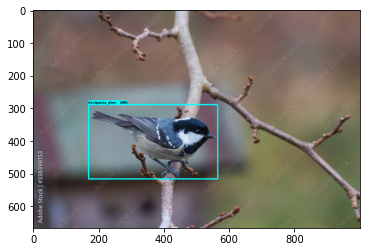

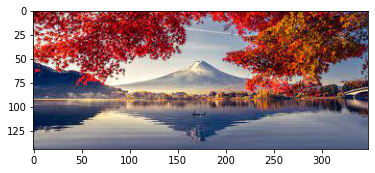

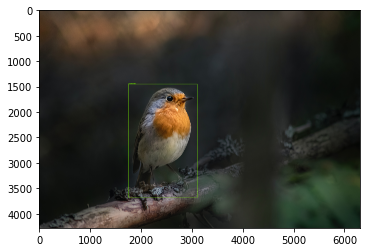

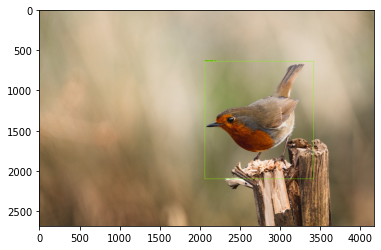

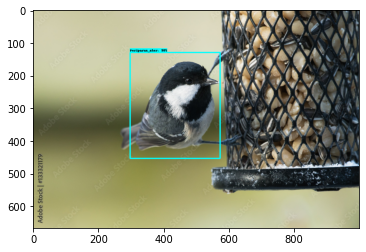

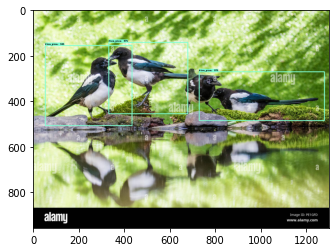

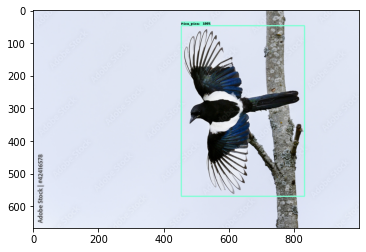

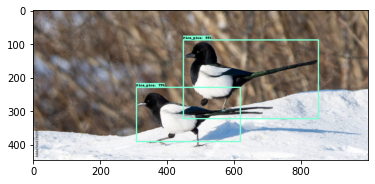

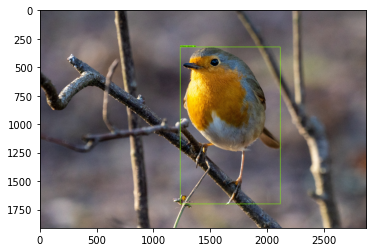

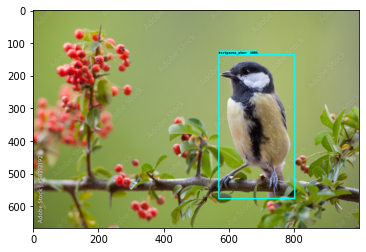

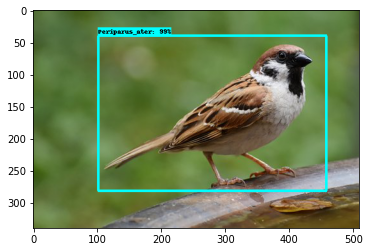

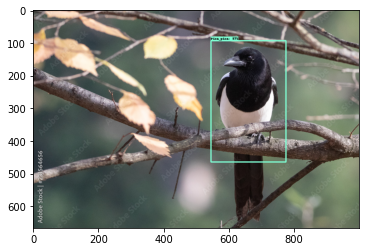

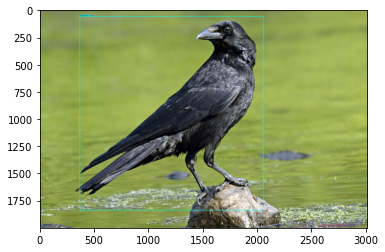

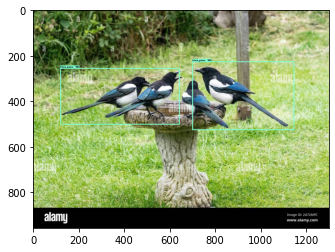

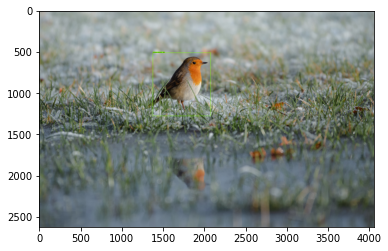

In [48]:
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR

print('Loading model...', end='')
start_time = time.time()
# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


# Suppress Matplotlib warnings
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
    path: the file path to the image
    Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

for image_path in os.listdir(IMAGE_PATHS):
    image_path = os.path.join(IMAGE_PATHS, image_path)
    print('Running inference for {}... '.format(image_path), end='')
    image_np = load_image_into_numpy_array(image_path)
    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()
    # Convert image to grayscale
    # image_np = np.tile()
    # np.mean(image_np, 2, keepdims=True), (1, 1, 3).astype(np.uint8)
        # The input needs to be a tensor, convert it using `tf.convert_to_tensor`
    input_tensor = tf.convert_to_tensor(image_np)
        # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]
        # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)
        # All outputs are batches tensors.
        # Convert to numpy arrays, and take index [0] to remove the batch dimensi
        # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                    for key, value in detections.items()}
    detections['num_detections'] = num_detections
        # detection_classes should be ints./

    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    image_np_with_detections = image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.75,
        agnostic_mode=False)
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()
# sphinx_gallery_thumbnail_number = 2



### <ins>Min Score Threshold</ins>

#### To filter out more detections we can set <mark>min_score_thresh</mark> values range from 0 to 1. In this model, we set the min_score_thresh to <mark>0.75</mark> because here the model predicts a particular box having an object belonging to a certain class very well.

### <ins>Inference Discussion</ins>

#### From above inferencing of this faster R-CNN Inception resnet object detection model it can be seen that model predicts did not predict well for the images having multiple objects. It can also be seen that for the first image model incorrectly detected orange objects as Erithacus class.

#### In order to test some other bird specie we included the image having sparrow and crow.  For these images our model incorrectly detects sparrow as peri_parus and crow as pica_pica.  We also tried one image having no bird species for that image our model did not predict anything.  

--------------------------------------------------------------------------------------------------------

# <ins>Chosen Model</ins>

#### From the discussion of inferencing of both object detection models it can be concluded that Faster R-CNN resnet101 model yields the best results for this dataset. Consequently, <mark>Faster R-CNN resnet101 object detection model</mark> has been chosen for the identification of birds species as tasked assigned by <mark>BBC Autumnwatch</mark>.